In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pickle
from scipy import stats
import random
from IPython.display import display, Markdown
import pickle
from pandas import Series
from collections import defaultdict
import math
import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from tqdm import tqdm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import f1_score, auc, accuracy_score, recall_score, precision_score,\
confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
train=pd.read_csv("C:\\Users\\shekh\\Downloads\\aps_failure_training_set (1).csv", skiprows=20)

In [4]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
train.shape

(60000, 171)

In [6]:
train['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

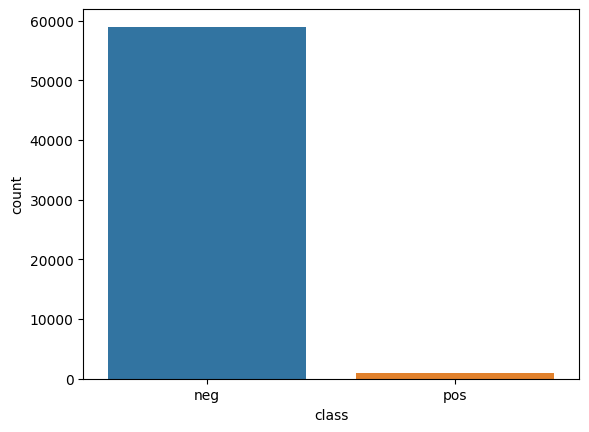

In [7]:
sns.countplot(train['class'])

* as we can see that density of neg is more which implies that the data is imbalanced

In [8]:
#replacing na with nan
train.replace(to_replace=['na','nan'],value = np.NaN,inplace=True)

In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count in the column', '% of Total Observations in the column'])
missing.index.name ='Feature'

missing.head(10)

,Total Missing Count in the column,% of Total Observations in the column
Feature,,
br_000,49264,82.106667
bq_000,48722,81.203333
bp_000,47740,79.566667
bo_000,46333,77.221667
ab_000,46329,77.215000
cr_000,46329,77.215000
bn_000,44009,73.348333
bm_000,39549,65.915000
bl_000,27277,45.461667


* above information table shows that number of missing values and its percentage of missing values

In [10]:
columns=train.columns

<AxesSubplot: >

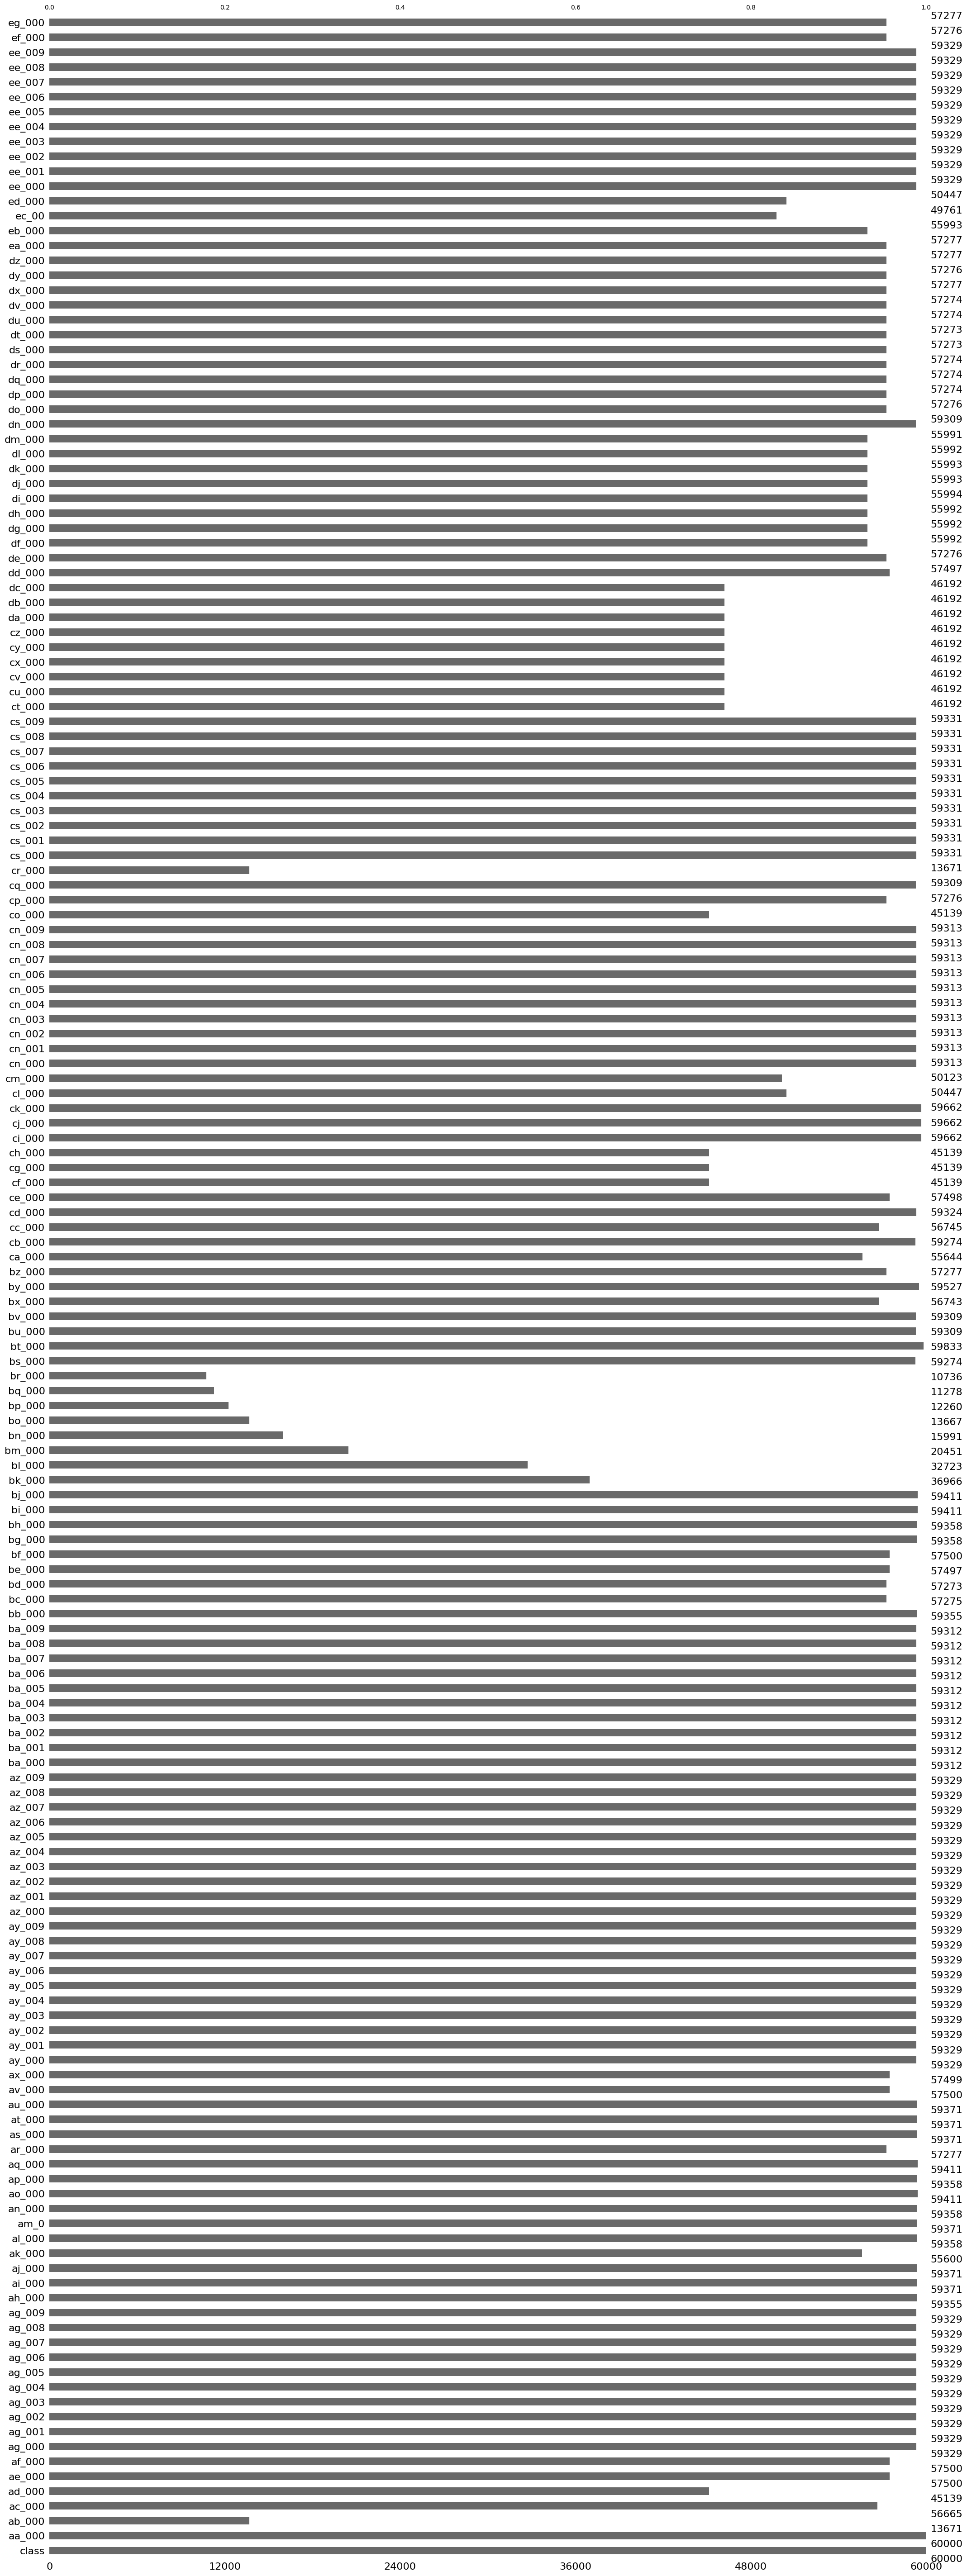

In [11]:
## we will use the python library missingno which can be used to represent the missing number
msno.bar(train[columns])

* above msno bar chat represents graphically how much data is missing out of total

## visualizing the types of data type
   * reference from kaggle for this below code


<AxesSubplot: title={'center': 'count of datatypes'}, xlabel='variable datatypes', ylabel='count'>

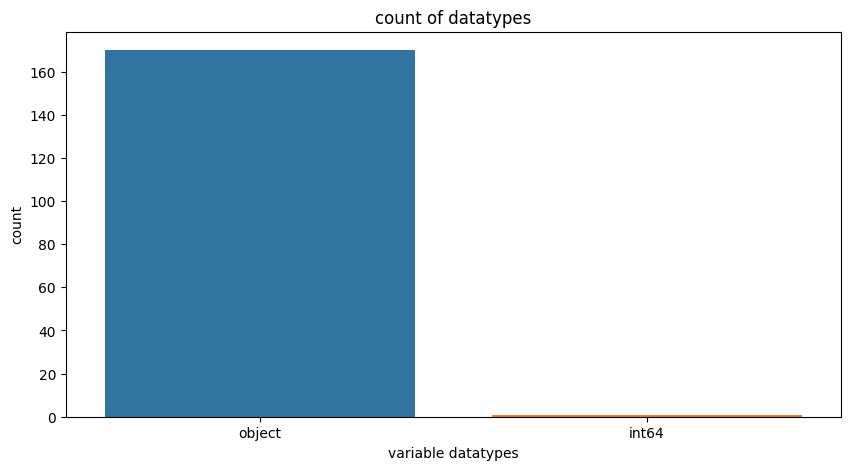

In [46]:
plt.figure(figsize=(10,5))
plt.xlabel('variable datatypes')
plt.title('count of datatypes')
sns.countplot(x=train.dtypes)


* as we can cleary see above and by observing the data that many features are not of there original data type we will fix this in feature engineering

#### univariate analysis of data

In [12]:
#to see which column is int
for col in train.columns:
    print(f"{col}: {train[col].dtype}")

class: object
aa_000: int64
ab_000: object
ac_000: object
ad_000: object
ae_000: object
af_000: object
ag_000: object
ag_001: object
ag_002: object
ag_003: object
ag_004: object
ag_005: object
ag_006: object
ag_007: object
ag_008: object
ag_009: object
ah_000: object
ai_000: object
aj_000: object
ak_000: object
al_000: object
am_0: object
an_000: object
ao_000: object
ap_000: object
aq_000: object
ar_000: object
as_000: object
at_000: object
au_000: object
av_000: object
ax_000: object
ay_000: object
ay_001: object
ay_002: object
ay_003: object
ay_004: object
ay_005: object
ay_006: object
ay_007: object
ay_008: object
ay_009: object
az_000: object
az_001: object
az_002: object
az_003: object
az_004: object
az_005: object
az_006: object
az_007: object
az_008: object
az_009: object
ba_000: object
ba_001: object
ba_002: object
ba_003: object
ba_004: object
ba_005: object
ba_006: object
ba_007: object
ba_008: object
ba_009: object
bb_000: object
bc_000: object
bd_000: object
be_000: object

* only aa_000 is of int type and we have to visualize and analyse on top of it
* as we can see in above that types of data there is only one int, lets analyze it

((array([-4.23255856, -4.02871318, -3.91765076, ...,  3.91765076,
          4.02871318,  4.23255856]),
  array([ 0.       ,  0.       ,  0.       , ..., 14.6557523, 14.7053378,
         14.8258616])),
 (3.0298362479015304, 8.646472449040342, 0.9383635216575363))

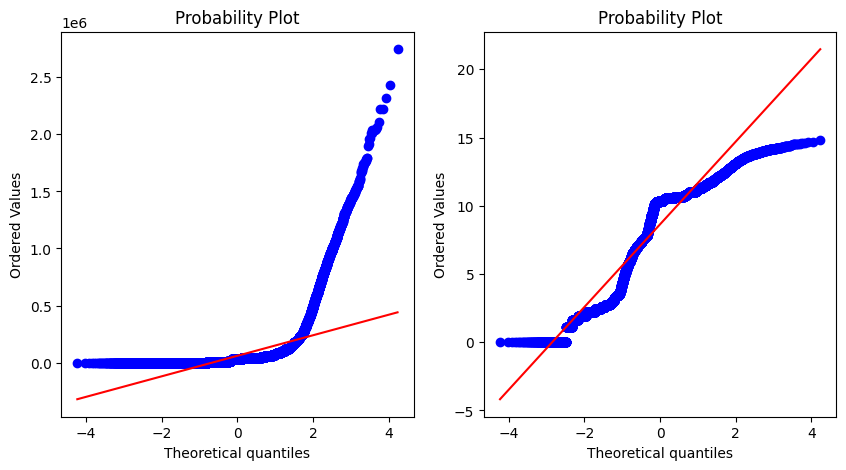

In [60]:
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)
stats.probplot(train["aa_000"], dist='norm', fit=True, plot=axes[0])
stats.probplot(np.log1p(train["aa_000"]), dist='norm', fit=True, plot=axes[1])

<AxesSubplot: xlabel='aa_000', ylabel='Density'>

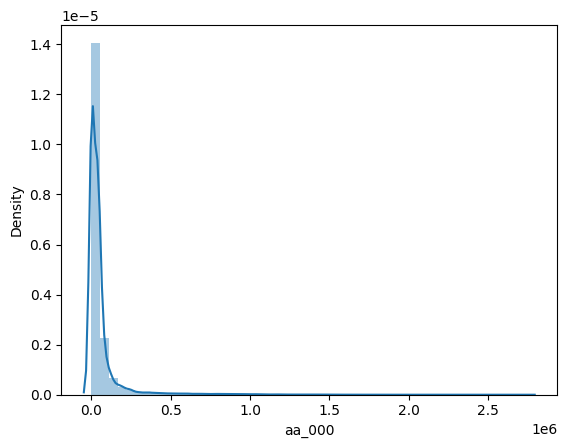

In [15]:
sns.distplot(train['aa_000'])

* as we can see in above the given feature train.aa_000 does not follow normal distribution

In [14]:
#separating the target columns from the data
y_train=train['class']
train_without_class=train.drop('class',axis=1)

In [63]:
#Imputing the missing data with mean values for further analysis
impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
train_mean_imputed = pd.DataFrame(impute_mean.fit_transform(train_without_class),columns=train_without_class.columns)
train_mean_imputed.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


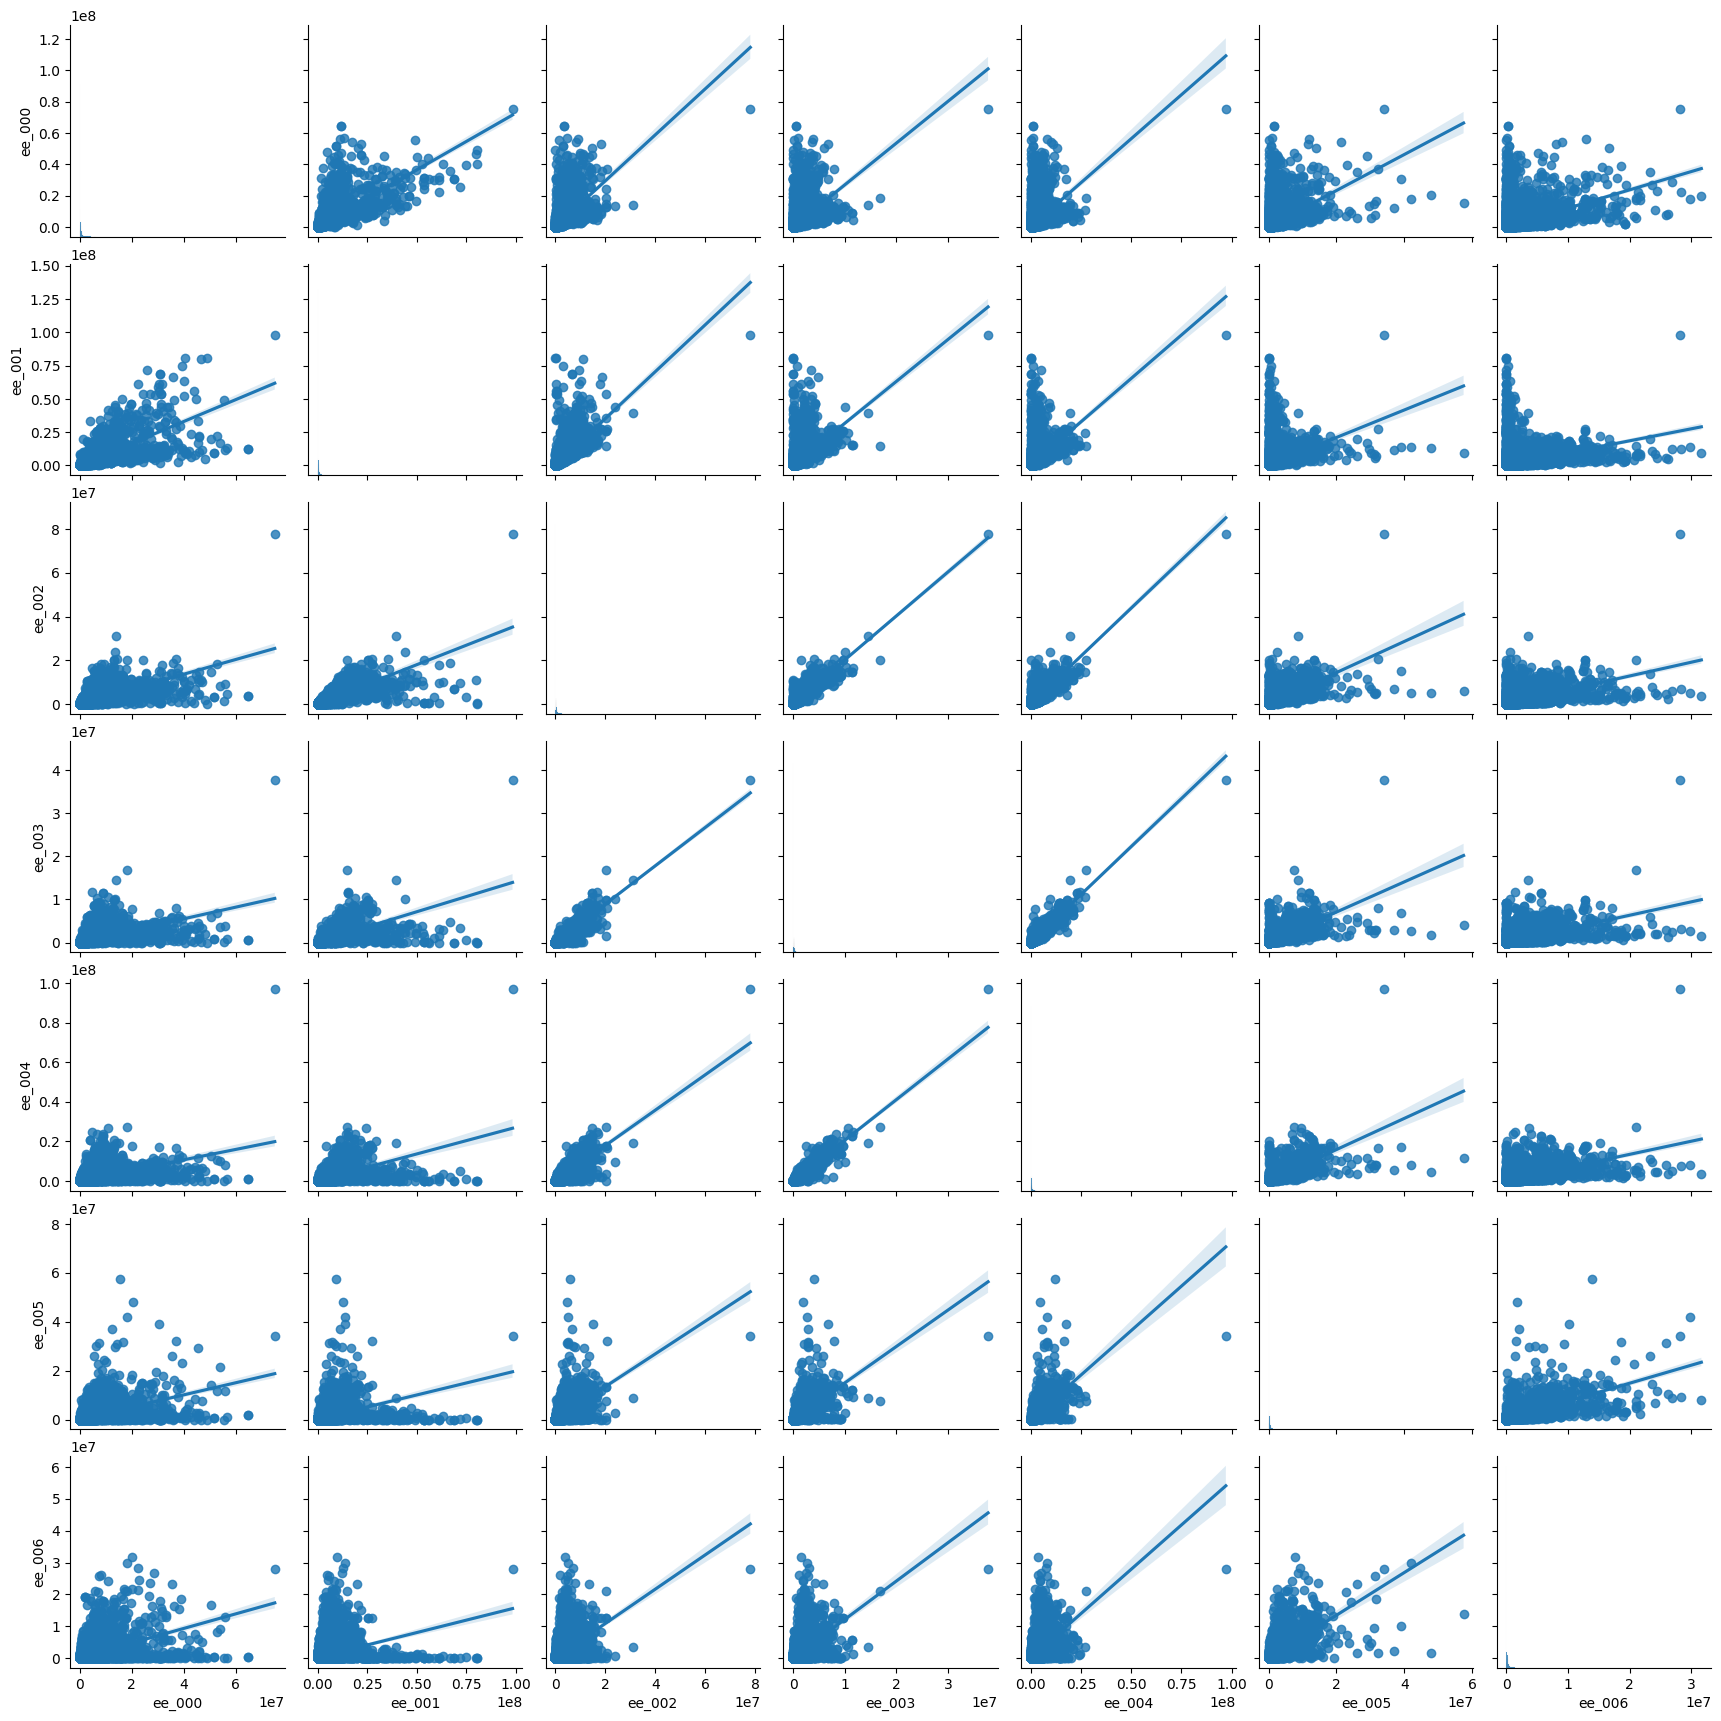

In [108]:
sns.pairplot(train_mean_imputed, vars=['ee_000', "ee_001", "ee_002", 'ee_003', 'ee_004', 'ee_005', 'ee_006'], kind="reg")

In [138]:
train['aa_000'].dtype #let compare this only int column to targeg column

dtype('int64')

#### comparing through the box plot

<function matplotlib.pyplot.show(close=None, block=None)>

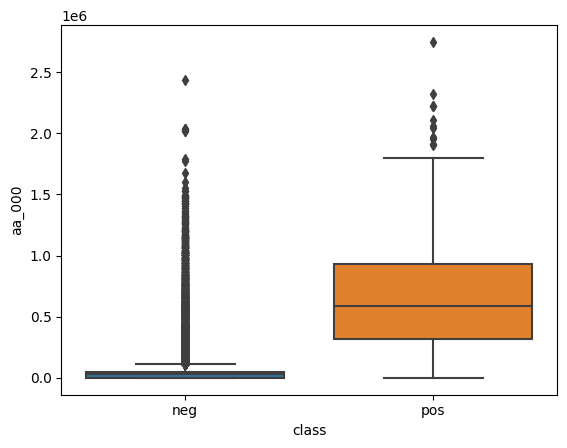

In [140]:
sns.boxplot(x='class',y='aa_000', data=train)
plt.show

* as we can see in above graph that there are more outliers in neg class as compare to positive class

* here also neg class has more outliers for ee_000 feature as compared to pos of ee_000

<AxesSubplot: xlabel='class', ylabel='cc_000'>

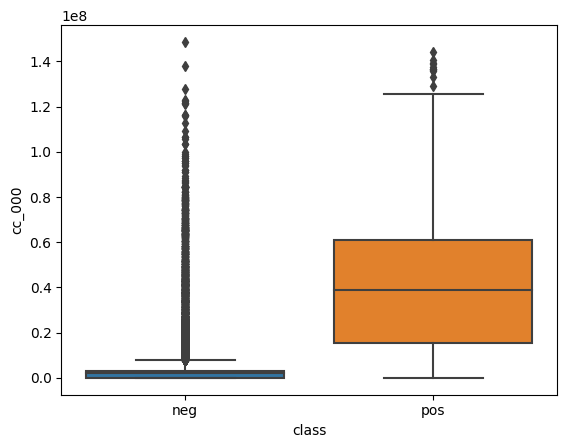

In [151]:
sns.boxplot(x='class', y=train['cc_000'].astype(float), data=train)

* as we can see there are more outliers in the neg for cc_000 feature than pos of cc_000

In [156]:
cols='ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004','ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009'

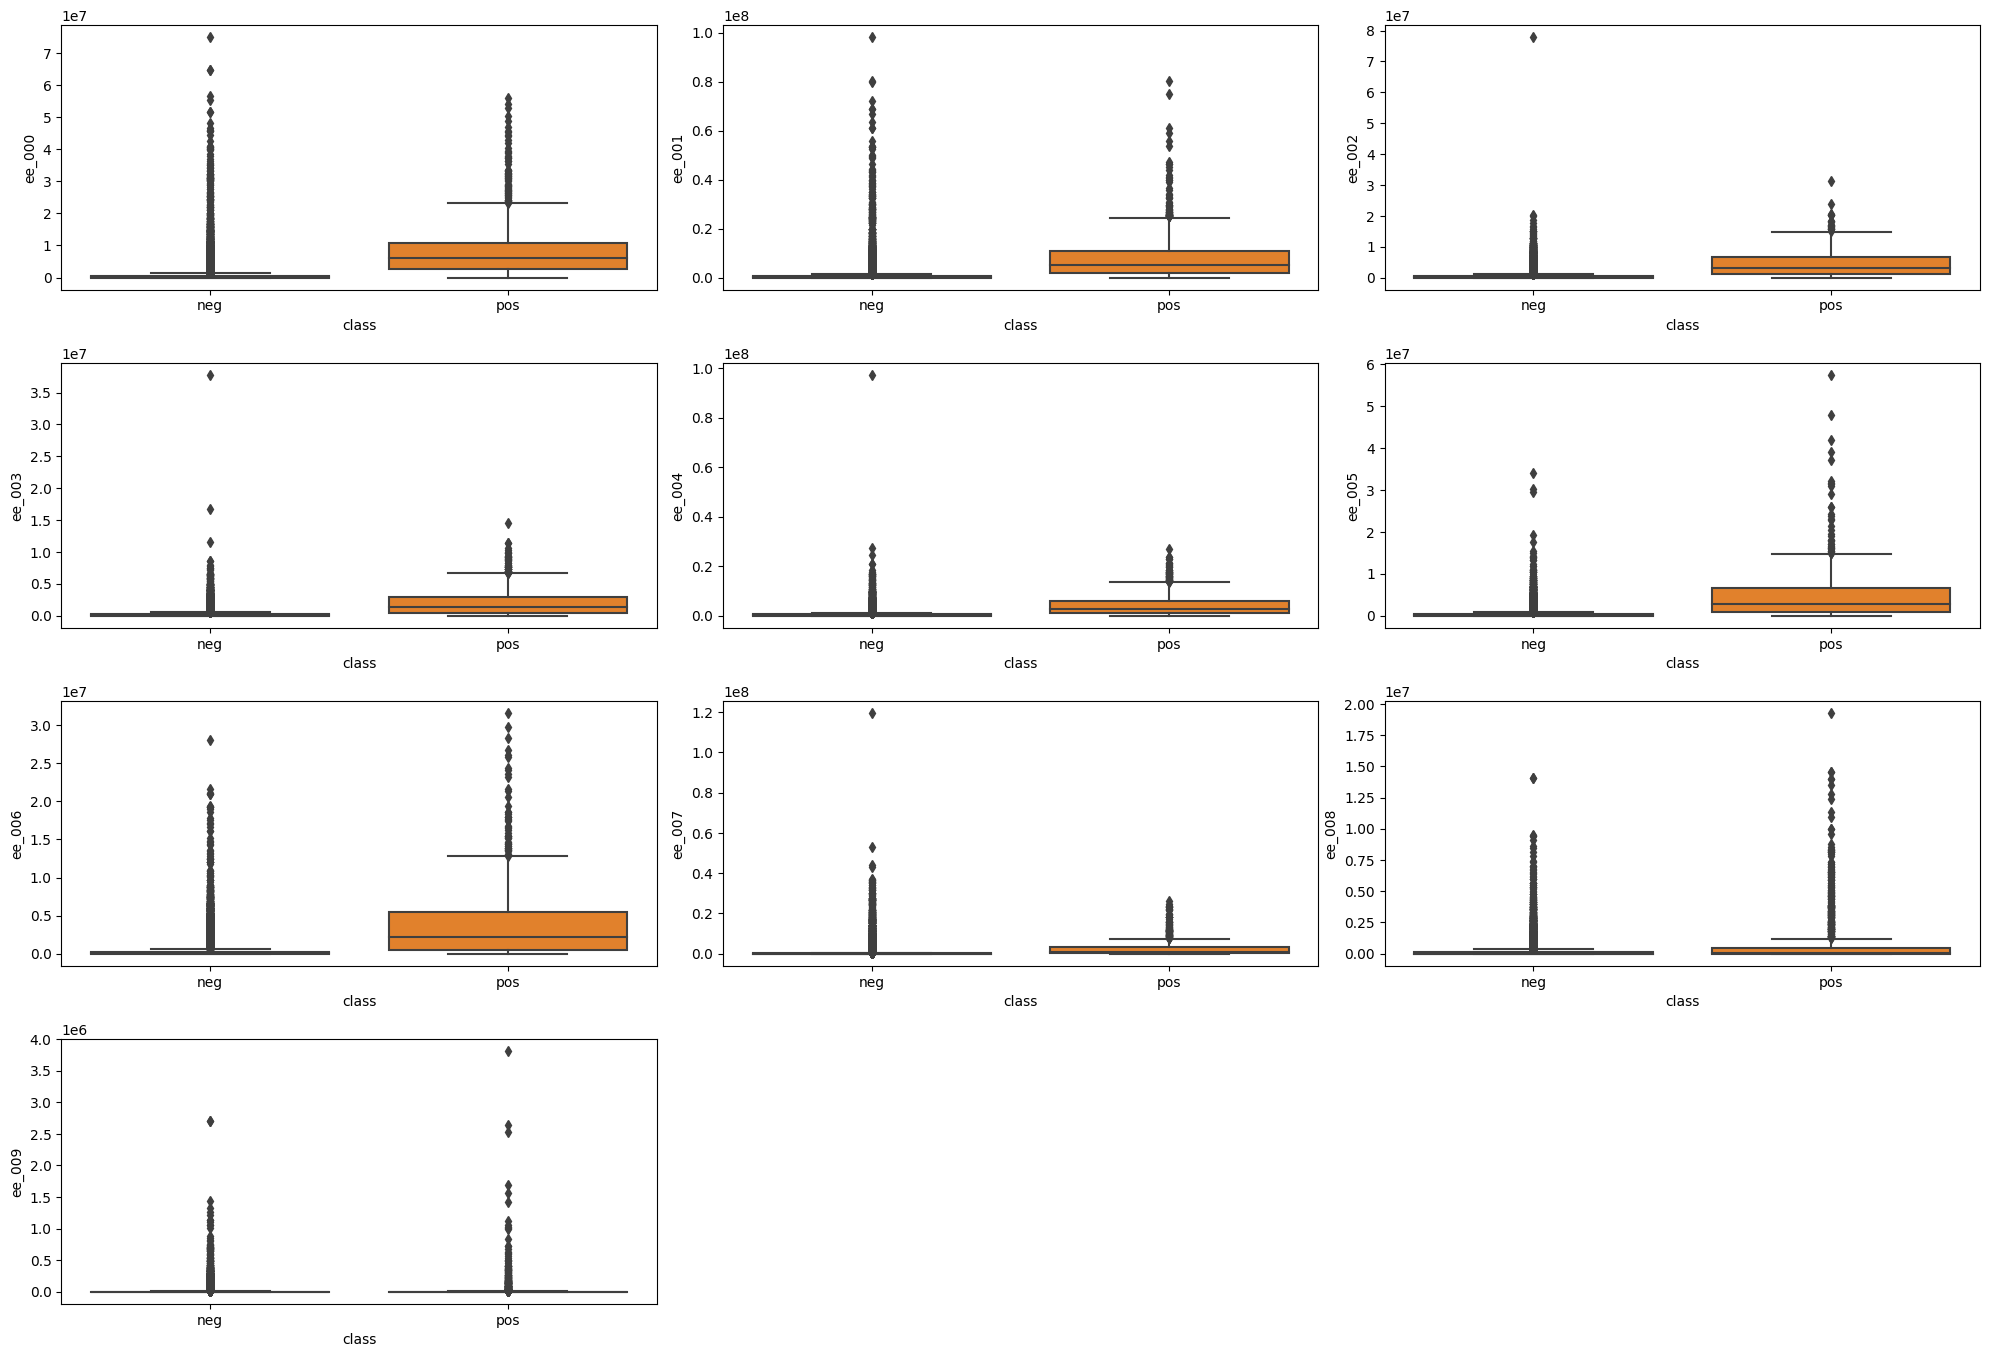

In [166]:
plt.figure(figsize=(20,20))
pot=1
for i in cols:
    if pot<=10:
        plt.subplot(6,3,pot)
        sns.boxplot(x='class', y=train[i].astype(float), data=train)
        pot+=1
plt.tight_layout()
                                       
    

* as we can clearly see the neg and pos outliers in the features which belong to ee type
* we can see that in most of the cases neg class has more outliers density as compared to the pos
* in some cases there are equal density of outliers spread in both neg and pos with respect to ee_(000 to 009) type feature

## test data

In [16]:
test=pd.read_csv("C:\\Users\\shekh\\Downloads\\aps_failure_test_set.csv", skiprows=20)

In [17]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


<AxesSubplot: xlabel='class', ylabel='count'>

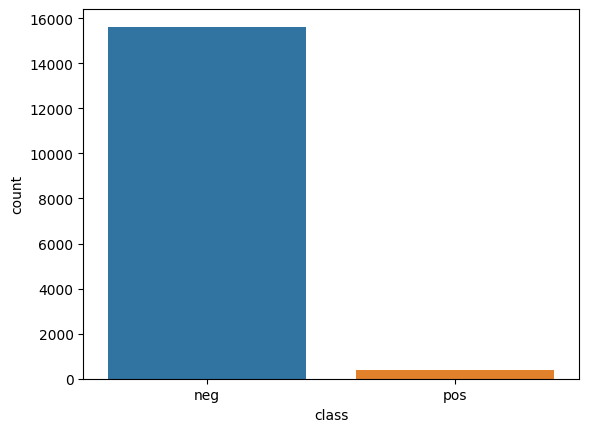

In [18]:
sns.countplot(test['class'])

* as we can see that density of neg is more which implies that the data is imbalanced

In [21]:
test.shape

(16000, 171)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [33]:
test.replace(to_replace=['na','nan'],value = np.NaN,inplace=True)

In [34]:
cols=test.columns

<AxesSubplot: >

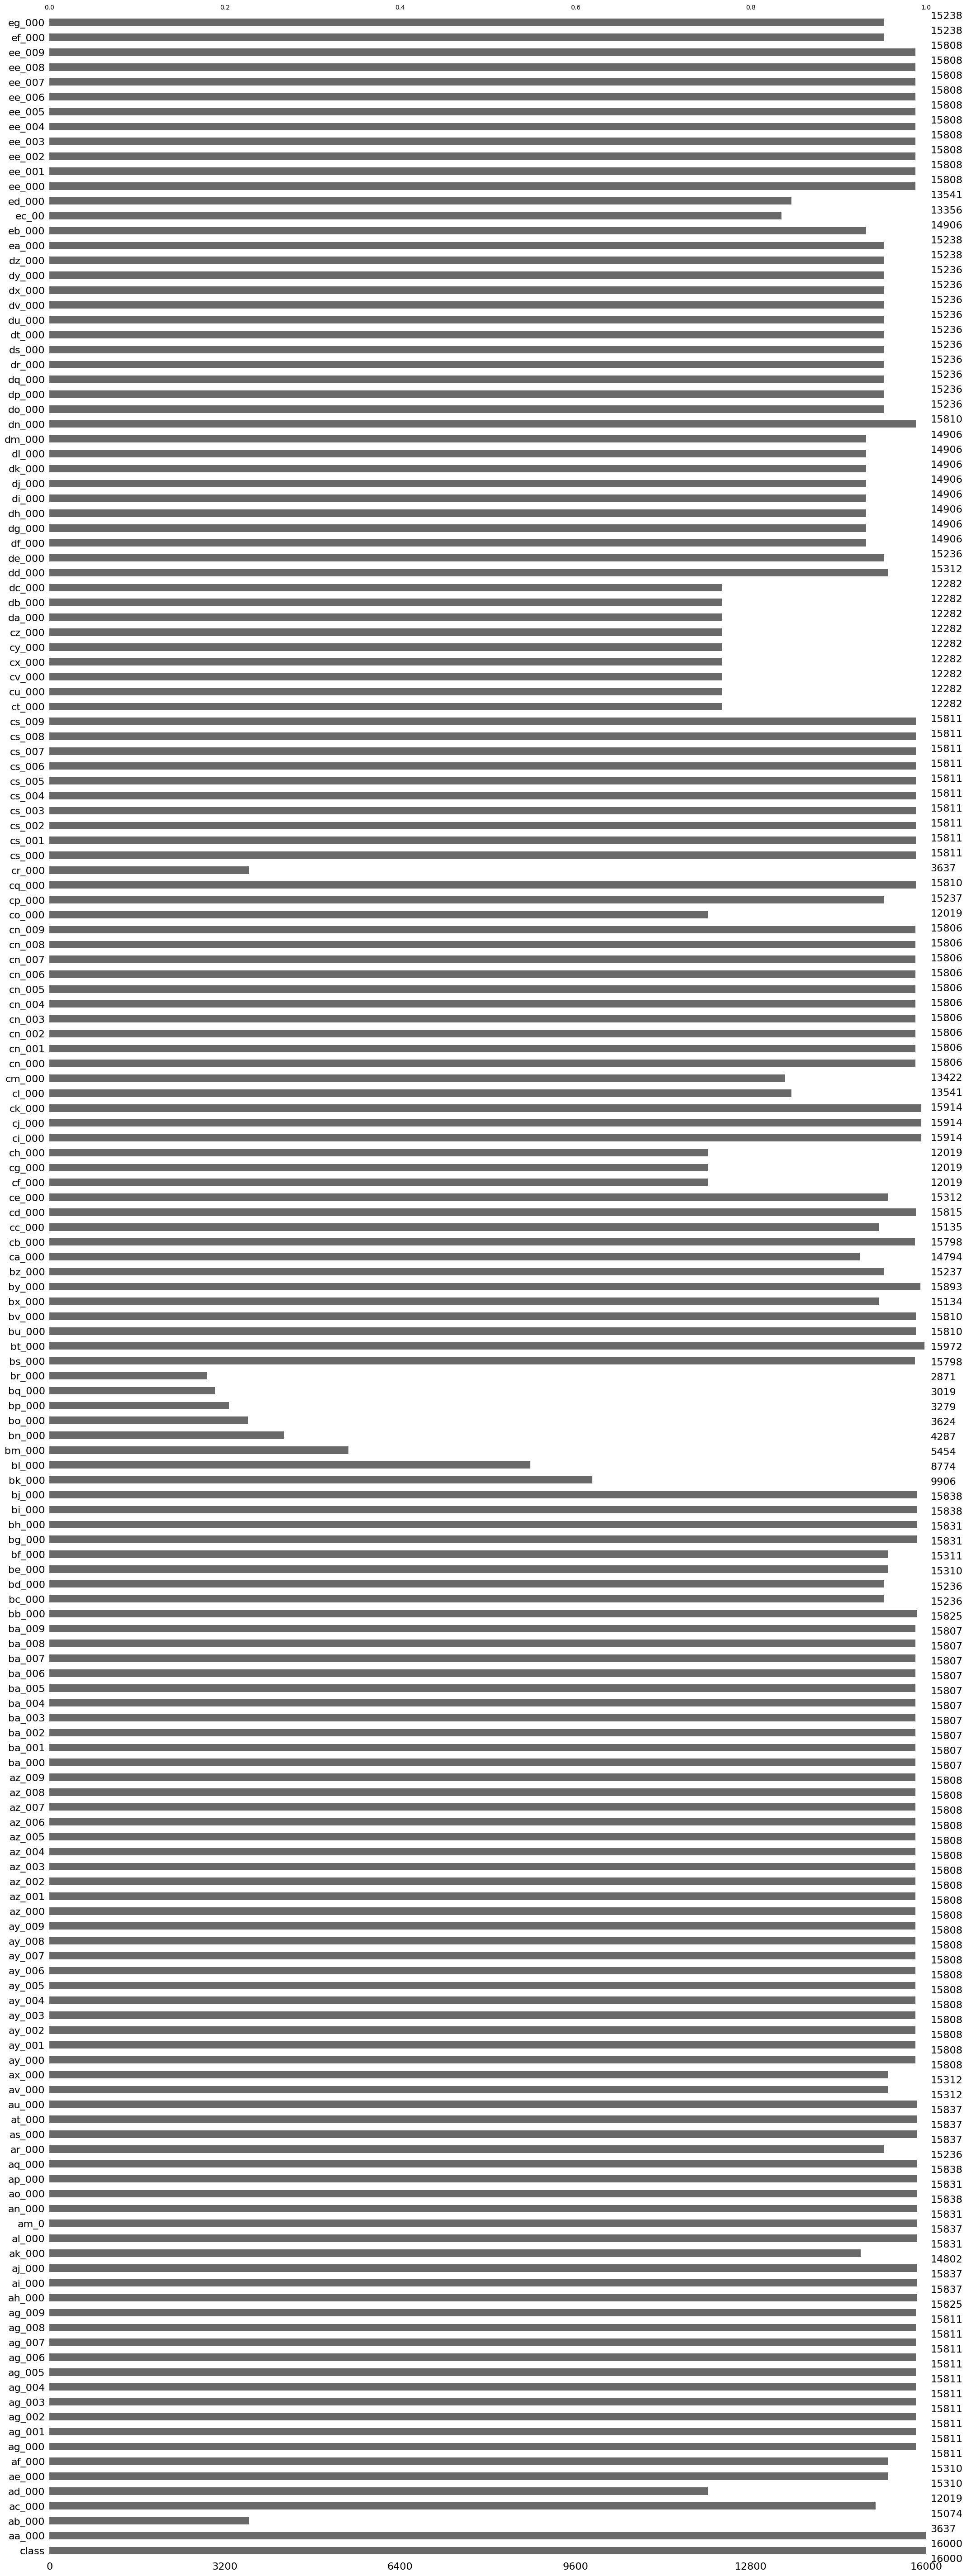

In [35]:
msno.bar(test[cols])

<AxesSubplot: ylabel='count'>

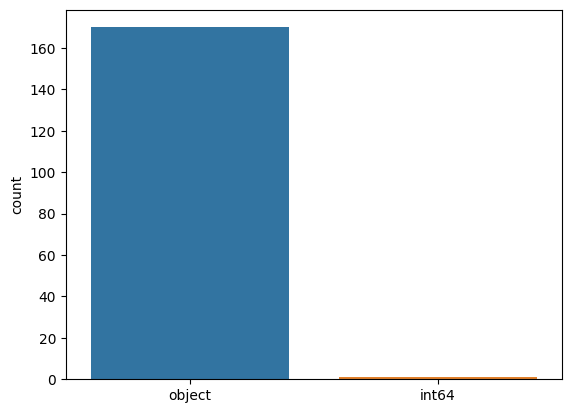

In [36]:
sns.countplot(test.dtypes)

In [37]:
#to see which column is int
for col in test.columns:
    print(f"{col}: {train[col].dtype}")

class: object
aa_000: int64
ab_000: object
ac_000: object
ad_000: object
ae_000: object
af_000: object
ag_000: object
ag_001: object
ag_002: object
ag_003: object
ag_004: object
ag_005: object
ag_006: object
ag_007: object
ag_008: object
ag_009: object
ah_000: object
ai_000: object
aj_000: object
ak_000: object
al_000: object
am_0: object
an_000: object
ao_000: object
ap_000: object
aq_000: object
ar_000: object
as_000: object
at_000: object
au_000: object
av_000: object
ax_000: object
ay_000: object
ay_001: object
ay_002: object
ay_003: object
ay_004: object
ay_005: object
ay_006: object
ay_007: object
ay_008: object
ay_009: object
az_000: object
az_001: object
az_002: object
az_003: object
az_004: object
az_005: object
az_006: object
az_007: object
az_008: object
az_009: object
ba_000: object
ba_001: object
ba_002: object
ba_003: object
ba_004: object
ba_005: object
ba_006: object
ba_007: object
ba_008: object
ba_009: object
bb_000: object
bc_000: object
bd_000: object
be_000: object

<function matplotlib.pyplot.show(close=None, block=None)>

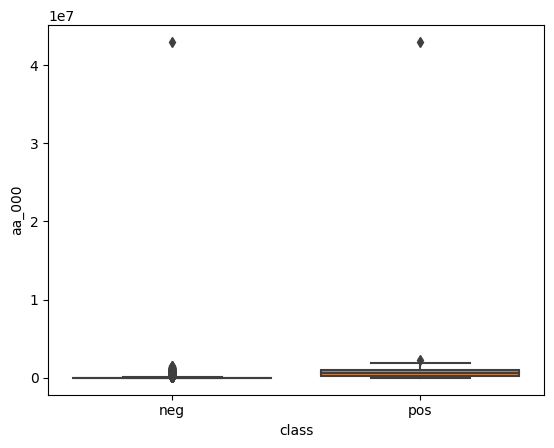

In [38]:
sns.boxplot(x='class',y='aa_000', data=test)
plt.show

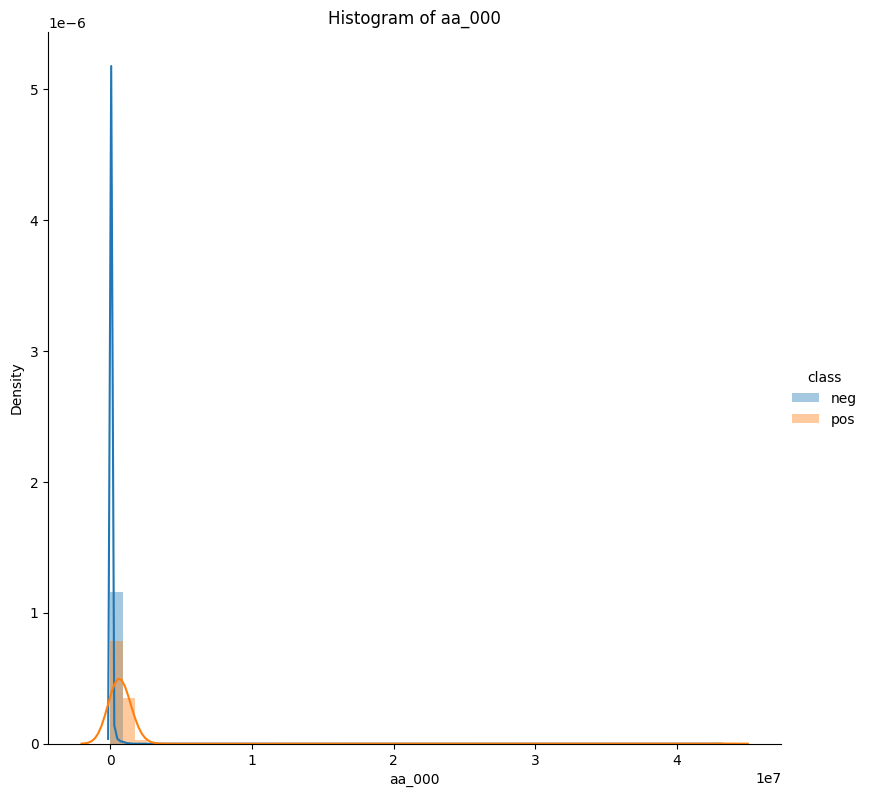

In [39]:
#Histogram of aa_000 feature
sns.FacetGrid(test, hue="class", size=8).map(sns.distplot, "aa_000").add_legend()
plt.title("Histogram of aa_000")
plt.show()

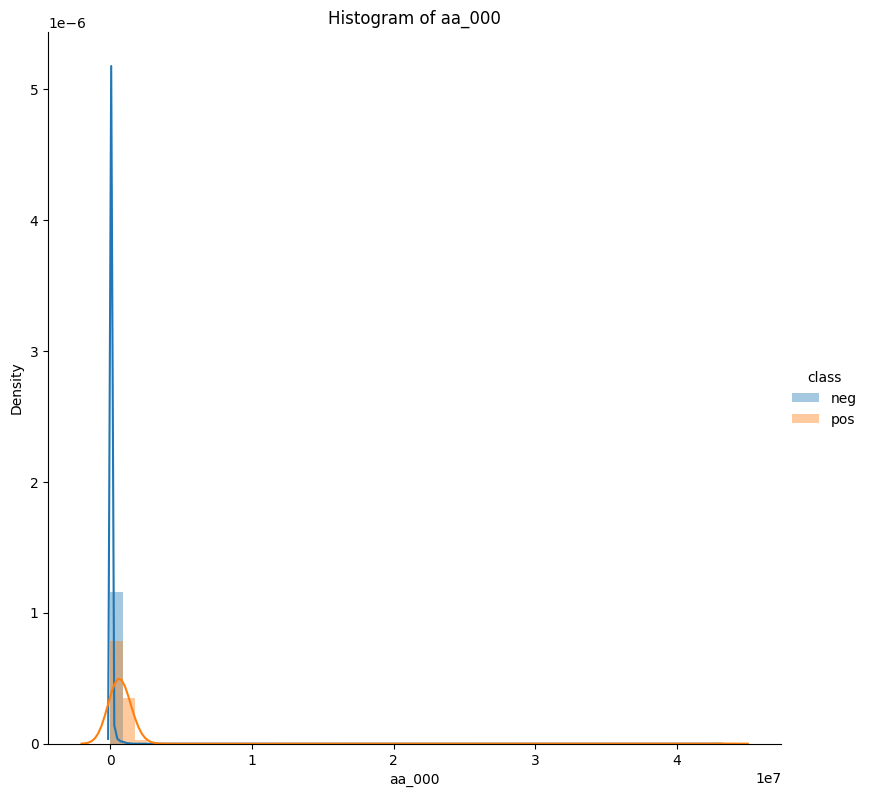

In [43]:
#Histogram of aa_000 feature
sns.FacetGrid(test, hue="class", size=8).map(sns.distplot, "aa_000").add_legend()
plt.title("Histogram of aa_000")
plt.show()

* As we can see in the above graph that neg has a huge spread then the pos 

## we can make the following conclusion by observing above train and test dataset
* in the both the dataset, datatypes of each columns is not correct
* there are huge missing data in both the dataset 
* there are outliers present in the dataset
* in some cases the pos spread is greater than neg and in other neg spread is greater than the pos
* due to the unmatching datatype in both dataset object type data(which is wrong) dominates
* due to dominating of neg than pos in value_counts this data is imbalance
* nature of both the test and train dataset is same
